In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'C:/playdata/To_raise_a_child_well/data/dohee/'
sum_df = pd.read_excel(path+'전국데이터프레임2006_2021.xlsx', index_col = 0)
sum_df

,실업률,이혼율,고령화비율,혼인건수,소비자물가지수,출산아수/가임기여성의수,아파트전세지수,미분양주택지수,은행예금지수,경제활동참가율,지가변동률
시점,,,,,,,,,,,
1999-06-01,5.6,0.001352,NaN,36243.0,61.349,NaN,NaN,NaN,NaN,49.0,NaN
1999-07-01,5.6,0.001913,NaN,25464.0,61.140,NaN,NaN,NaN,NaN,48.7,NaN
1999-08-01,5.0,0.002503,NaN,19217.0,61.765,NaN,NaN,NaN,NaN,48.1,NaN
1999-09-01,4.2,0.002985,NaN,16485.0,61.921,NaN,NaN,NaN,NaN,49.2,NaN
1999-10-01,4.0,0.002003,NaN,24713.0,62.389,NaN,NaN,NaN,NaN,49.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,2.5,NaN,17.8,NaN,108.930,0.001486,102.8,102.8,1958348.3,55.1,NaN
2022-10-01,2.4,NaN,17.9,NaN,109.210,0.001486,101.4,101.4,1967290.0,55.0,NaN
2022-11-01,2.3,NaN,17.9,NaN,109.100,0.001486,99.0,99.0,1970661.1,55.1,NaN


In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 분리
from sklearn.model_selection import GridSearchCV, train_test_split
x = sum_df.drop(['출산아수/가임기여성의수'], axis = 1).loc['2006-01-01' : '2021-12-01'].values
y = sum_df['출산아수/가임기여성의수'].loc['2006-01-01' : '2021-12-01']
            
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_train.shape, x_test.shape

((153, 10), (39, 10))

In [74]:
# 데이터 프레임
knn_reg_df = pd.DataFrame(index = ['mse', 'rmse', 'r2'])
dt_reg_df = pd.DataFrame(index = ['mse', 'rmse', 'r2'])
rf_reg_df = pd.DataFrame(index = ['mse', 'rmse', 'r2'])

# 객체 형성
knn_reg = KNeighborsRegressor()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
        
# 파라미터 설정
params_knn = {'n_neighbors': [2, 3, 4, 5]}
params_dt = {'max_depth': [2, 3, 4, 5]}
params_rf = {'max_depth': [2, 3, 4, 5], 'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# knn그리드서치
grid_search_knn = GridSearchCV(knn_reg, param_grid = params_knn, cv=5)
grid_search_knn.fit(x_train, y_train)
# 출력
print("Best hyperparameters: ", grid_search_knn.best_params_)
print("Best score: ", grid_search_knn.best_score_)
# 제일 좋은 것으로 다시돌리기
best_knn = KNeighborsRegressor(n_neighbors = grid_search_knn.best_params_['n_neighbors'])
best_knn.fit(x_train, y_train)
# 평가하기 
print('KNeighborsRegressor')
train_score = best_knn.score(x_train, y_train)
print("Train set score: ", train_score)
test_score = best_knn.score(x_test, y_test)
print("Test set score: ", test_score)
print('------------')

#--------------------

# dt그리드서치
grid_search_dt = GridSearchCV(dt_reg, param_grid = params_dt, cv=5)
grid_search_dt.fit(x_train, y_train)
# 출력
print("Best hyperparameters: ", grid_search_dt.best_params_)
print("Best score: ", grid_search_dt.best_score_)
# 제일 좋은 것으로 다시돌리기
best_dt = DecisionTreeRegressor(max_depth = grid_search_dt.best_params_['max_depth'])
best_dt.fit(x_train, y_train)
# 평가하기 
print('DecisionTreeRegressor')
train_score = best_dt.score(x_train, y_train)
print("Train set score: ", train_score)
test_score = best_dt.score(x_test, y_test)
print("Test set score: ", test_score)
print('------------')


# rf그리드서치
grid_search_rf = GridSearchCV(rf_reg, param_grid = params_rf, cv=5)
grid_search_rf.fit(x_train, y_train)
# 출력
print("Best hyperparameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)
# 제일 좋은 것으로 다시돌리기
best_rf = RandomForestRegressor(max_depth = grid_search_rf.best_params_['max_depth'], 
                               n_estimators = grid_search_rf.best_params_['n_estimators'])
best_rf.fit(x_train, y_train)
# 평가하기 
print('RandomForestRegressor')
train_score = best_rf.score(x_train, y_train)
print("Train set score: ", train_score)
test_score = best_rf.score(x_test, y_test)
print("Test set score: ", test_score)
print('------------')

Best hyperparameters:  {'n_neighbors': 5}
Best score:  0.865793870938752
KNeighborsRegressor
Train set score:  0.9160732001210499
Test set score:  0.9177128657080384
------------
Best hyperparameters:  {'max_depth': 4}
Best score:  0.8835841579524374
DecisionTreeRegressor
Train set score:  0.9342024637078636
Test set score:  0.8868241790853224
------------
Best hyperparameters:  {'max_depth': 5, 'n_estimators': 20}
Best score:  0.9092118390153938
RandomForestRegressor
Train set score:  0.9570403945362571
Test set score:  0.9316617591872313
------------


In [77]:
best_rf_reg.feature_importances_

array([0.00528358, 0.01949997, 0.17519034, 0.01125177, 0.08442341,
       0.06576308, 0.04431804, 0.566076  , 0.01604082, 0.01215298])

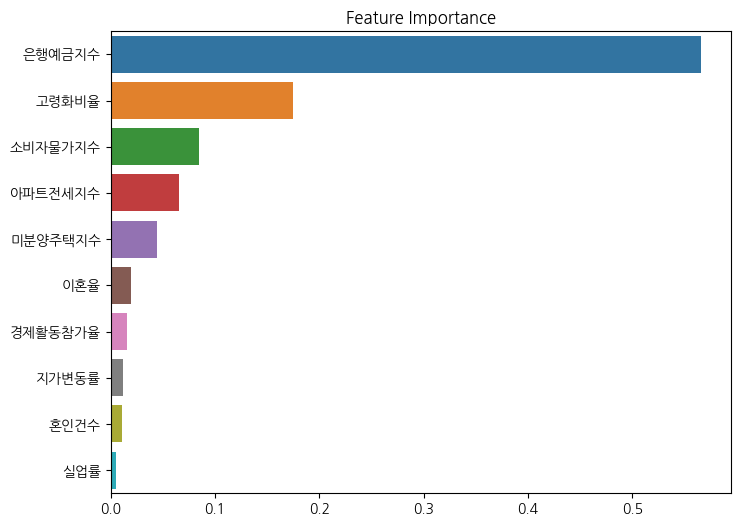

In [78]:
# 특성 중요도
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_imt = pd.Series(best_rf_reg.feature_importances_, index = sum_df.drop(['출산아수/가임기여성의수'], axis = 1).columns).sort_values(ascending=False)

mpl.rc('font', family='NanumGothic', size = 10)
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(x = ft_imt, y = ft_imt.index)
plt.show()

In [25]:
max(rf_reg_df.loc['r2'])

0.938

In [1]:
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor?

Init signature:
KNeighborsRegressor(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets
associated of the nearest neighbors in the training set.

Read more in the :ref:`User Guide <regression>`.

.. versionadded:: 0.9

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.